# OkCupid Project

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import numpy as np
import re
import string
import base64
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='svg'

# Exploratory Data Analysis and Preprocessing

In [2]:
d = pd.read_csv("C:/Users/kmche/Desktop/UCI MSBA/BANA 212/okcupid_profiles.csv")
# Number of profiles in dataset 
print("There are {} rows in dataset".format(len(d)))

# Male vs Female users in dataset 
male = d[d["sex"]=="m"] 
female = d[d["sex"]=="f"] 

# Sex Percentage 
print("There are {} ({:.2%}) males and {} ({:.2%}) females".format(len(male),len(male)/len(d), len(female),len(female)/len(d)))

There are 59946 rows in dataset
There are 35829 (59.77%) males and 24117 (40.23%) females


In [3]:
# IQR for Age 
Q1 = np.percentile(d["age"], 25, interpolation = 'midpoint')  
Q2 = np.percentile(d["age"], 50, interpolation = 'midpoint')  
Q3 = np.percentile(d["age"], 75, interpolation = 'midpoint')  
print('Q1 25th percentile of the given data is:', Q1) 
print('Q2 50th percentile of the given data is:', Q2) 
print('Q3 75th percentile of the given data is:', Q3) 
  
IQR = Q3 - Q1  
print('Interquartile range is', IQR) 

low_lim = Q1 - 1.5 * IQR 
up_lim = Q3 + 1.5 * IQR 
print('lower limit is', low_lim) 
print('upper limit is', up_lim) 

Q1 25th percentile of the given data is: 26.0
Q2 50th percentile of the given data is: 30.0
Q3 75th percentile of the given data is: 37.0
Interquartile range is 11.0
lower limit is 9.5
upper limit is 53.5


In [4]:
# Summary statistics of age 
print("Age statistics:\n{}".format(d["age"].describe()))
# Looking at ages
print("There are {} users older than 52".format((d["age"]>=53).sum()))
print("There are {} users older than 64".format((d["age"]>=65).sum()))

Age statistics:
count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64
There are 2890 users older than 52
There are 372 users older than 64


In [5]:
# Removing 65 and older users
d = d[d["age"]<65]

# Number of profiles after removing 65 and older users
print("There are {} rows after removing 65 and over users".format(len(d)))

# Male vs Female users after removing 65 and older users 
male = d[d["sex"]=="m"] 
female = d[d["sex"]=="f"] 
print("There are {} ({:.2%}) males and {} ({:.2%}) females".format(len(male),len(male)/len(d), len(female),len(female)/len(d)))

print()
# Summary statistics of age 
print("Age statistics:\n{}".format(d["age"].describe()))

There are 59574 rows after removing 65 and over users
There are 35657 (59.85%) males and 23917 (40.15%) females

Age statistics:
count    59574.000000
mean        32.125827
std          9.079038
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max         64.000000
Name: age, dtype: float64


In [6]:
# Mean and median age for male and female
print("Mean and median age for males:   {:.2f}, {:.2f}".format(male["age"].mean(),male["age"].median()))
print("Mean and median age for females: {:.2f}, {:.2f}".format(female["age"].mean(),female["age"].median()))

Mean and median age for males:   31.85, 30.00
Mean and median age for females: 32.54, 30.00


In [7]:
# Finding count and percent of NA per column
total_na = d.isna().count()
count_na = d.isna().sum().sort_values(ascending = False)
percent_na =(d.isna().sum()/total_na).sort_values(ascending = False)
pd.options.display.float_format = '{:.1%}'.format
na_table = pd.concat([count_na, percent_na], axis=1, keys=['Count', 'Percent'])
na_table


,Count,Percent
offspring,35452,59.5%
diet,24247,40.7%
religion,20163,33.8%
pets,19804,33.2%
essay8,19118,32.1%
drugs,14041,23.6%
essay6,13692,23.0%
essay9,12530,21.0%
essay7,12382,20.8%
essay3,11425,19.2%


In [8]:
# checking income variable
d.income.value_counts()

-1          48161
 20000       2941
 100000      1608
 80000       1101
 30000       1037
 40000        996
 50000        963
 60000        727
 70000        699
 150000       625
 1000000      520
 250000       148
 500000        48
Name: income, dtype: int64

In [9]:
# -1 in income means NA, therefore replace with NA 
d['income'] = d['income'].replace([-1], np.NaN)

In [10]:
# Benchmark or reference for which columns to use for future analysis
# New NA table 
total_na = d.isna().count()
count_na = d.isna().sum().sort_values(ascending = False)
percent_na =(d.isna().sum()/total_na).sort_values(ascending = False)
pd.options.display.float_format = '{:.1%}'.format
na_table = pd.concat([count_na, percent_na], axis=1, keys=['Count', 'Percent'])
na_table

,Count,Percent
income,48161,80.8%
offspring,35452,59.5%
diet,24247,40.7%
religion,20163,33.8%
pets,19804,33.2%
essay8,19118,32.1%
drugs,14041,23.6%
essay6,13692,23.0%
essay9,12530,21.0%
essay7,12382,20.8%


### Reference for essays: 
- 'essay0' : 'My self summary'
- 'essay1' : 'What I'm doing with my life'
- 'essay2' : 'I'm really good at'
- 'essay3' : 'The first thing people notice about me'
- 'essay4' : 'Favorite books, movies, tv, food'
- 'essay5' : 'The six things I could never do without'
- 'essay6' : 'I spend a lot of time thinking about'
- 'essay7' : 'On a typical Friday night I am'
- 'essay8' : 'The most private thing I am willing to admit'
- 'essay9' : 'You should message me if'

In [11]:
# filling all NA with blank
d = d.fillna(" ")

In [12]:
# Number of users per ethnicity 
ethnicity = d['ethnicity'].value_counts().sort_values(ascending=False)[:20]
ethnicity

white                      32525
asian                       6130
                            5656
hispanic / latin            2817
black                       1999
other                       1696
hispanic / latin, white     1299
indian                      1076
asian, white                 811
white, other                 640
pacific islander             432
asian, pacific islander      395
native american, white       334
middle eastern               328
middle eastern, white        300
black, white                 298
pacific islander, white      156
hispanic / latin, other      138
black, other                 133
black, hispanic / latin      119
Name: ethnicity, dtype: int64

In [13]:
# List of different body types and # of users per body type 
print('body_type:')
print(list(set(d['body_type'])))

body_type = d['body_type'].value_counts().sort_values(ascending = False)
body_type

body_type:
['thin', 'overweight', 'a little extra', 'skinny', 'fit', 'used up', 'rather not say', 'jacked', 'full figured', 'curvy', 'athletic', ' ', 'average']


average           14532
fit               12618
athletic          11784
                   5280
thin               4684
curvy              3900
a little extra     2593
skinny             1776
full figured        997
overweight          440
jacked              420
used up             353
rather not say      197
Name: body_type, dtype: int64

In [14]:
# function to show percentage on graphs
def show_percentage(graph, attribute):
    total = len(attribute)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()+p.get_width()/2-0.1
        y = p.get_y()+p.get_height()
        ax.annotate(percentage, (x, y), size=10)

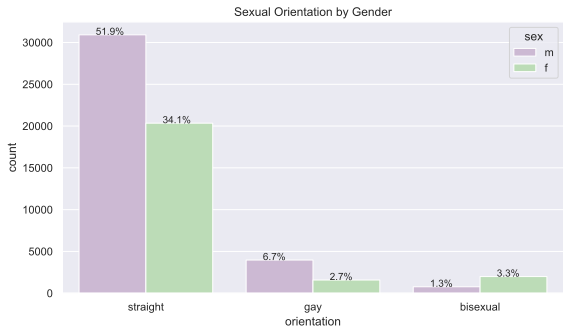

In [15]:
# bar plot of orientation by sex 
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='orientation', data=d, 
                   hue='sex', 
                   palette='PRGn',
                   order=d['orientation'].value_counts().iloc[:10].index) 
ax.set_title("Sexual Orientation by Gender")
total = float(len(d))
show_percentage(ax, d)
plt.show()

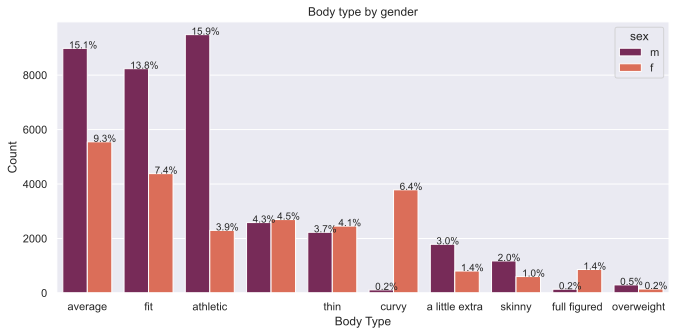

In [16]:
# Body type by Gender
plt.figure(figsize=(11, 5))
ax = sns.countplot(x='body_type', data=d, 
                   hue='sex', 
                   palette='rocket',
                   order=d['body_type'].value_counts().iloc[:10].index)
ax.set_title("Body type by gender")
ax.set(xlabel='Body Type', ylabel='Count') 
show_percentage(ax, d)
plt.show()

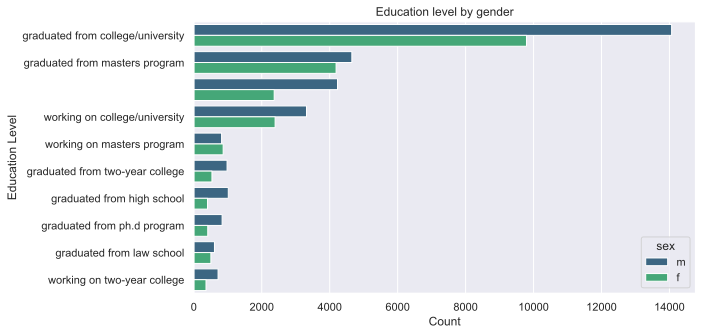

In [17]:
# Education level by gender 
plt.figure(figsize=(9, 5))
ax = sns.countplot(y='education', data=d, 
                   hue='sex', 
                   palette='viridis',
                   order=d['education'].value_counts().iloc[:10].index)
ax.set_title("Education level by gender")
ax.set(xlabel='Count', ylabel='Education Level') 
# show_percentage(ax, d)
plt.show()

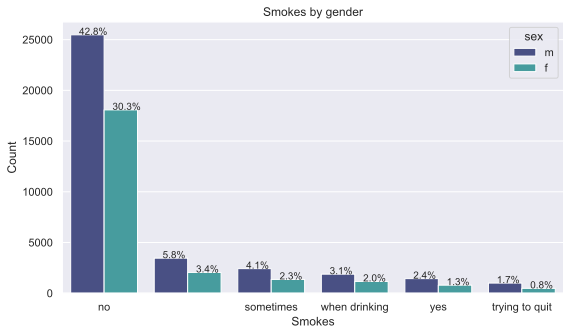

In [18]:
# Smokes by gender 
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='smokes', data=d, 
                   hue='sex', 
                   palette='mako',
                   order=d['smokes'].value_counts().iloc[:10].index)
ax.set_title("Smokes by gender")
ax.set(xlabel='Smokes', ylabel='Count') 
show_percentage(ax, d)
plt.show()

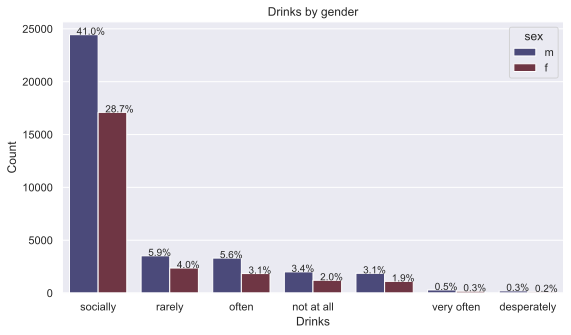

In [19]:
# Drinks by gender
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='drinks', data=d, 
                   hue='sex', 
                   palette='icefire',
                   order=d['drinks'].value_counts().iloc[:10].index)
ax.set_title("Drinks by gender")
ax.set(xlabel='Drinks', ylabel='Count') 
show_percentage(ax, d)
plt.show()

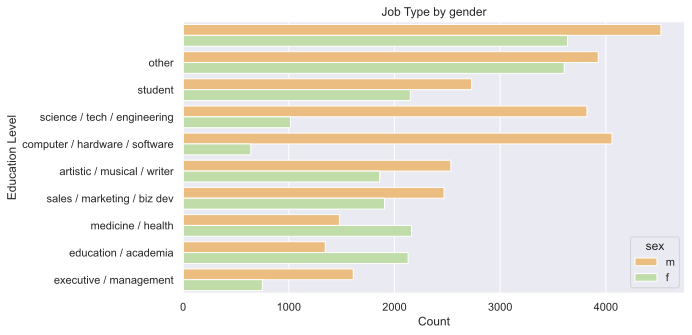

In [20]:
# Job by Gender
plt.figure(figsize=(9, 5))
ax = sns.countplot(y='job', data=d, 
                   hue='sex', 
                   palette='Spectral',
                   order=d['job'].value_counts().iloc[:10].index)
ax.set_title("Job Type by gender")
ax.set(xlabel='Count', ylabel='Education Level') 
plt.show()

# Text Analysis for Topic Modeling 

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk

In [22]:
# Need to download stopwords for nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kmche\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
# stopwords that we will use to remove from text for analysis
stopwords.words('english')
# Number of stopwords
len(stopwords.words('english'))

179

In [24]:
# Need for tokenization
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kmche\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
# Function for tokenization to be used on essay free text responses (no stemming)
stopwords_list = []

stopwords = set(stopwords.words('english'))
stopwords1 = stopwords.union(set(stopwords_list)) # stopwords into list

def tokenize(text):
    try: 
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]') # remove punctuation, numbers, white space
        text = regex.sub(" ", text) 
        
        tokens1 = [word_tokenize(s) for s in sent_tokenize(text)] # tokenize the text into tokenized sentences, then to tokenized words
        tokens = []
        for token_by_sent in tokens1:
            tokens += token_by_sent
            
        tokens = list(filter(lambda t: t.lower() not in stopwords1, tokens))
        new_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        new_tokens = [w.lower() for w in new_tokens if len(w)>=3]
        # convert tokens to lowercase and extract tokens with length greater than 2 
        
        return new_tokens
            
    except TypeError as e: print(text,e)

In [26]:
# function for tokenization including stemming 
from nltk.stem.porter import PorterStemmer

# Initialize stemmer using porterstemmer
stemmer = PorterStemmer()

def tokenize_stem(text):
    try: 
        regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]') 
        text = regex.sub(" ", text) 
        
        tokens1 = [word_tokenize(s) for s in sent_tokenize(text)] 
        tokens = []
        for token_by_sent in tokens1:
            tokens += token_by_sent
        tokens = list(filter(lambda t: t.lower() not in stopwords1, tokens))
        new_tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
        new_tokens = [w.lower() for w in new_tokens if len(w)>=3]
        
        # Stemming 
        stems = [stemmer.stem(item) for item in new_tokens]
        return stems
    
    except TypeError as e: print(text,e)

In [27]:
# Function to print top words in topic modeling
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_): #model.components_ gives an array (n_components, n_features)
        message = "Topic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("_"*70) 

Analyzing tokenization function with and without stemming on essay0 as this was the essay prompt with the most response. Will compare different topic models to determine which one gives more insights in each topic. 

In [28]:
# include 10 top n_grams/terms
n_top_words = 10

In [29]:
# Convert essay0 to string type 
d['essay0'] = d['essay0'].astype(str)

# apply the tokenize function to essay0 (no stemming)
d['tokens0'] = d['essay0'].map(tokenize)
d.reset_index(drop=True, inplace=True)

# Initializing TfidfVectorizer on essay0
tfidf_vec0 = TfidfVectorizer(min_df=0.005, # ignoring less than .5% occurrence
                             max_features=None,
                             tokenizer=tokenize,
                             ngram_range=(2, 3) # bigrams and trigrams 
                            )

# extracting text responses
tfidf_e0 = d['essay0'].values
# outputs sparse matrix of TF IDF weights 
tfidf_vz0 = tfidf_vec0.fit_transform(list(tfidf_e0))

In [30]:
# NMF with TfidfVectorizer on essay 0 (no stemming)
nmf0 = NMF(init="nndsvd",
            n_components=20,
            max_iter=200, random_state=0)
A0 = tfidf_vz0
W0 = nmf0.fit_transform(A0) 
H0 = nmf0.components_ 

tfidf_feature_names0 = tfidf_vec0.get_feature_names()
print_top_words(nmf0, tfidf_feature_names0, n_top_words)

Topic #0:san francisco moved san moved san francisco living san living san francisco lived san san francisco years francisco years recently moved los angeles
______________________________________________________________________
Topic #1:new things trying new trying new things try new try new things learning new learning new things new places learn new things love
______________________________________________________________________
Topic #2:bay area moved bay moved bay area area native bay area native back bay grew bay lived bay living bay bay area years
______________________________________________________________________
Topic #3:meeting new meeting new people new people love meeting interested meeting new places looking forward hanging friends new friends people like
______________________________________________________________________
Topic #4:sense humor good sense good sense humor great sense great sense humor get along love laugh like think take seriously make laugh
________

In [31]:
# Initializing COUNT VECTORIZER for LDA model (no stemming)
count_vec0 = CountVectorizer(min_df=0.005, 
                             ngram_range=(2, 3)) 
# fit_transform gives an array of counts of bigrams/trigrams
bag_of_words0 = count_vec0.fit_transform(d['tokens0'].apply(lambda x: ' '.join(x)))

print("The features are:\n {}".format(count_vec0.get_feature_names()))
# get feature names: array mapping from feature integer to feature name: gives a list of feature names. 
print("\nThe vectorized array looks like:\n {}".format(bag_of_words0.toarray()))

The features are:
 ['absolutely love', 'almost anything', 'along way', 'also enjoy', 'also like', 'also love', 'also really', 'always looking', 'anything else', 'area native', 'area years', 'around city', 'around people', 'around world', 'back bay', 'bay area', 'bay area native', 'bay area years', 'best friend', 'big fan', 'board games', 'born raised', 'burning man', 'camping hiking', 'close family', 'close friends', 'couple years', 'currently working', 'east bay', 'east coast', 'easy get', 'easy going', 'enjoy cooking', 'enjoy going', 'enjoy good', 'enjoy life', 'enjoy outdoors', 'enjoy spending', 'enjoy spending time', 'enjoy traveling', 'enjoying life', 'even though', 'ever since', 'every day', 'everyone else', 'explore new', 'exploring city', 'exploring new', 'family friends', 'favorite things', 'feel free', 'feel like', 'find someone', 'first time', 'four years', 'francisco years', 'free time', 'friends family', 'friends love', 'friends would', 'full time', 'fun loving', 'get alon

In [32]:
# LDA with CountVectorizer on essay 0 (no stemming)
# looking at 20 topics
lda0 = LatentDirichletAllocation(n_components=20, 
                                max_iter=10,
                                learning_method = 'online',
                                random_state = 0)
lda0.fit(bag_of_words0)

print("Topics in LDA on CountVectorizer: ")
lda_feature_names0 = count_vec0.get_feature_names()
print_top_words(lda0, lda_feature_names0, n_top_words)

Topics in LDA on CountVectorizer: 
Topic #0:friends family spend time good time new places people love like good life fullest living life people say person like
______________________________________________________________________
Topic #1:east coast spending time high school love life time friends exploring new two years went college like laugh love job
______________________________________________________________________
Topic #2:sense humor things like love good like going west coast let see simple things los angeles northern california would rather
______________________________________________________________________
Topic #3:bay area free time want know moved bay online dating little bit moved bay area like people watching movies around world
______________________________________________________________________
Topic #4:open minded get know really like hanging friends getting know road trips love traveling want someone really want friends love
_________________________________

In [33]:
# Takes long time to run 
# apply the tokenize_stem function to essay0 (with stemming)
d['tokens0_stem'] = d['essay0'].map(tokenize_stem)
d.reset_index(drop=True, inplace=True)

# Initializing TfidfVectorizer on essay0
tfidf_vec0_stem = TfidfVectorizer(min_df=0.005,
                             max_features=None,
                             tokenizer=tokenize_stem,
                             ngram_range=(2, 3) 
                            )

tfidf_e0_stem = d['essay0'].values
tfidf_vz0_stem = tfidf_vec0_stem.fit_transform(list(tfidf_e0_stem))

In [34]:
# NMF with TfidfVectorizer on essay 0 (with stemming)
nmf0_stem = NMF(init="nndsvd",
            n_components=20,
            max_iter=200, random_state=0)
A0_stem = tfidf_vz0_stem
W0_stem = nmf0_stem.fit_transform(A0_stem) 
H0_stem = nmf0_stem.components_ 

tfidf_feature_names0_stem = tfidf_vec0_stem.get_feature_names()
print_top_words(nmf0_stem, tfidf_feature_names0_stem, n_top_words)

Topic #0:love travel good time fun love love laugh also love enjoy life live life work hard feel like watch movi
______________________________________________________________________
Topic #1:san francisco move san move san francisco recent move new york love san san francisco year francisco year move back lo angel
______________________________________________________________________
Topic #2:new peopl meet new meet new peopl look meet look meet new love meet new love meet enjoy meet new friend like meet
______________________________________________________________________
Topic #3:bay area move bay move bay area live bay live bay area area nativ bay area nativ back bay area year bay area year
______________________________________________________________________
Topic #4:new thing tri new tri new thing learn new learn new thing love tri love tri new like tri like tri new new place
______________________________________________________________________
Topic #5:easi go pretti easi pr

In [35]:
# Initializing COUNT VECTORIZER for LDA model (with stemming)
count_vec0_stem = CountVectorizer(min_df=0.005, ngram_range=(2, 3))
bag_of_words0_stem = count_vec0_stem.fit_transform(d['tokens0_stem'].apply(lambda x: ' '.join(x)))

# print("The features are:\n {}".format(count_vec0_stem.get_feature_names()))
# print("\nThe vectorized array looks like:\n {}".format(bag_of_words0_stem.toarray()))

In [36]:
# LDA with CountVectorizer on essay 0 (with stemming)
lda0_stem = LatentDirichletAllocation(n_components=20, 
                                max_iter=10,
                                learning_method = 'online',
                                random_state = 0)
lda0_stem.fit(bag_of_words0_stem)

print("Topics in LDA on CountVectorizer: ")
lda_feature_names0_stem = count_vec0_stem.get_feature_names()
print_top_words(lda0_stem, lda_feature_names0_stem, n_top_words)

Topics in LDA on CountVectorizer: 
Topic #0:sens humor good food learn new good friend good sens good sens humor learn new thing good convers love love love good
______________________________________________________________________
Topic #1:also love want know rock climb like peopl explor citi interest peopl san diego coupl year bike ride went colleg
______________________________________________________________________
Topic #2:sens humor everi day love outdoor love cook take serious love go full time alway tri great sens know want
______________________________________________________________________
Topic #3:look someon watch movi enjoy life listen music love citi good listen tri anyth love laugh stay activ life look
______________________________________________________________________
Topic #4:new york even though onlin date part life feel free peopl like pretti good peopl make long time love hike
______________________________________________________________________
Topic #5:san

Tokenization with stemming using NMF model with TfidfVectorizer is the most informative out of the four options.
Therefore, we will proceed to use tokenize_stem with NMF model with TfidfVectorizer for further analyses. 

In [37]:
# top words to 15 for essay4 and essay1
n_top_words = 15

In [39]:
# Convert essay to string type 
d['essay4'] = d['essay4'].astype(str)

# apply the tokenize_stem function to essay4
d['tokens4_stem'] = d['essay4'].map(tokenize_stem)
d.reset_index(drop=True, inplace=True)

# checking for tokenization
# for profile, tokens in zip(d['essay4'].tail(1), d['tokens4_stem'].tail(1)):
#     print('essay4:', profile)
#     print()
#     print('tokens4_stem:', tokens)
    

In [40]:
# Initializing TFIDF VECTORIZER for NMF model for essay 4
tfidf_vec4 = TfidfVectorizer(min_df=0.005,
                             max_features=None,
                             tokenizer=tokenize_stem,
                             ngram_range=(2, 3) 
                            )

tfidf_e4 = d['essay4'].values
tfidf_vz4 = tfidf_vec4.fit_transform(list(tfidf_e4))

In [41]:
# Decimal format for visualizations
pd.options.display.float_format = '{:,.2f}'.format

In [42]:
#  Curious to see top n_grams in essay4: 'Favorite books, movies, tv, food'
tfidf4_table = dict(zip(tfidf_vec4.get_feature_names(), tfidf_vec4.idf_))

tfidf4_table = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf4_table), orient='index')
tfidf4_table.columns = ['tfidf']

# Lower the TF IDF score, the more common the word 
tfidf4_table.sort_values(by=['tfidf'], ascending=True).head(20)

,tfidf
hip hop,3.67
favorit book,3.89
favorit movi,3.92
arrest develop,3.92
pretti much,3.96
mad men,4.01
harri potter,4.09
game throne,4.11
non fiction,4.20
modern famili,4.20


In [43]:
# highest tfidf values for bigrams and trigrams
# higher the TF IDF score, the more rare the terms
tfidf4_table.sort_values(by=['tfidf'], ascending=False).head(20)

,tfidf
find nemo,6.29
gone wind,6.29
pop music,6.29
farmer market,6.29
read movi,6.29
enjoy good,6.29
bright eye,6.29
holi grail,6.29
snow crash,6.29
show love,6.29


In [44]:
# NMF with TfidfVectorizer on essay 4
nmf4 = NMF(init="nndsvd",
            n_components=20,
            max_iter=200, random_state=0)
A4 = tfidf_vz4 # articles by word
W4 = nmf4.fit_transform(A4) # topics by words
H4 = nmf4.components_ # articles by topics

In [45]:
tfidf_feature_names4 = tfidf_vec4.get_feature_names()
print_top_words(nmf4, tfidf_feature_names4, n_top_words)

Topic #0:fight club star war shawshank redempt lord ring pulp fiction famili guy red hot chili pepper hot chili red hot chili hot chili pepper south park star trek fear loath big lebowski
______________________________________________________________________
Topic #1:favorit movi favorit food favorit music favorit show movi time music favorit time favorit movi favorit food sushi one favorit favorit band food italian book favorit favorit author food favorit
______________________________________________________________________
Topic #2:hip hop music hip hop music hip old school classic rock rap hip hop rap hip indi rock famili guy food mexican movi comedi music rock altern rock food anyth music mostli
______________________________________________________________________
Topic #3:etern sunshin spotless mind sunshin spotless sunshin spotless mind etern sunshin spotless garden state donni darko lost translat royal tenenbaum american beauti requiem dream day summer littl miss sunshin miss 

In [46]:
# Convert essay1 to string type 
d['essay1'] = d['essay1'].astype(str)

# apply the tokenize_stem function to essay1
d['tokens1_stem'] = d['essay1'].map(tokenize_stem)
d.reset_index(drop=True, inplace=True)

# Initializing TfidfVectorizer on essay1
tfidf_vec1 = TfidfVectorizer(min_df=0.005,
                             max_features=None,
                             tokenizer=tokenize_stem,
                             ngram_range=(2, 3) 
                            )

tfidf_e1 = d['essay1'].values
tfidf_vz1 = tfidf_vec1.fit_transform(list(tfidf_e1))

In [47]:
#  Curious to see top n_grams in essay1: 'What I'm doing with my life'
tfidf1_table = dict(zip(tfidf_vec1.get_feature_names(), tfidf_vec1.idf_))

tfidf1_table = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf1_table), orient='index')
tfidf1_table.columns = ['tfidf']

# Lower the TF IDF score, the more common the word 
tfidf1_table.sort_values(by=['tfidf'], ascending=True).head(20)

,tfidf
san francisco,4.04
bay area,4.38
current work,4.42
spend time,4.58
full time,4.62
work hard,4.81
enjoy life,4.93
free time,5.02
grad school,5.04
non profit,5.05


In [48]:
# highest tfidf values for bigrams and trigrams
# higher the TF IDF score, the more rare the terms
tfidf1_table.sort_values(by=['tfidf'], ascending=False).head(20)

,tfidf
coupl year,6.29
also like,6.28
time job,6.28
thing life,6.28
watch movi,6.27
realli like,6.26
someth new,6.26
make world,6.26
take time,6.25
new friend,6.25


In [49]:
# NMF with TfidfVectorizer on essay 1: 'What I'm doing with my life'
nmf1 = NMF(init="nndsvd",
            n_components=20,
            max_iter=200, random_state=0)
A1 = tfidf_vz1
W1 = nmf1.fit_transform(A1) 
H1 = nmf1.components_ 

tfidf_feature_names1 = tfidf_vec1.get_feature_names()
print_top_words(nmf1, tfidf_feature_names1, n_top_words)

Topic #0:san francisco move san move san francisco new york year ago last year softwar engin move back high school live work love job explor citi also work graphic design two year
______________________________________________________________________
Topic #1:current work work toward work get love job tech compani master degre spare time work tech video game realli enjoy would like graphic design would love long term high school
______________________________________________________________________
Topic #2:bay area move back year ago last year look forward east bay tech compani new york new job love work meet new new peopl also work two year start new
______________________________________________________________________
Topic #3:full time work full work full time part time time job also work work part work part time time work right work work toward school work high school graphic design pay bill
______________________________________________________________________
Topic #4:spend tim

In [50]:
# Combining all essay columns into one column for NMF, sentiment analysis, wordcloud, matching algorithm
d["essays"]=""
for f in ["essay"+str(i) for i in range(10)]:
    d.loc[d[f].isnull(),f]=""
    d["essays"]=d["essays"]+" "+d[f]

In [51]:
# Takes very long time to run
# Convert combined essays to string type
d['essays'] = d['essays'].astype(str)

# apply the tokenize function to combined essays
d['token_essays_stem'] = d['essays'].map(tokenize_stem)
d.reset_index(drop=True, inplace=True)

# TFIDF VECTORIZER for all essays
tfidf_vec_all = TfidfVectorizer(min_df=0.005,
                             max_features=None,
                             tokenizer=tokenize_stem,
                             ngram_range=(2, 3) 
                            )

tfidf_all = d['essays'].values
tfidf_vz_all = tfidf_vec_all.fit_transform(list(tfidf_all))

In [52]:
#  Curious to see top n_grams in all essays
tfidf_all_table = dict(zip(tfidf_vec_all.get_feature_names(), tfidf_vec_all.idf_))

tfidf_all_table = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf_all_table), orient='index')
tfidf_all_table.columns = ['tfidf']

# Lower the TF IDF score, the more common the word 
tfidf_all_table.sort_values(by=['tfidf'], ascending=True).head(20)

,tfidf
famili friend,2.81
san francisco,2.81
bay area,2.92
friend famili,2.98
sens humor,3.08
watch movi,3.14
new thing,3.23
make peopl,3.30
get know,3.30
tri new,3.32


In [53]:
# highest tfidf values for bigrams and trigrams
# higher the TF IDF score, the more rare the terms
tfidf_all_table.sort_values(by=['tfidf'], ascending=False).head(20)

,tfidf
food pretti much,6.29
walk dog,6.29
life better,6.29
love live music,6.29
experienc new,6.29
movi especi,6.29
public transport,6.29
food chines,6.29
witti banter,6.29
kind peopl,6.29


In [54]:
# NMF using TF IDF vectorizer on combined essays 
nmf_all = NMF(init="nndsvd", # NNDSVD better with sparseness for NMF
            n_components=20,
            max_iter=500, random_state=0)
A_all = tfidf_vz_all
W_all = nmf_all.fit_transform(A_all)
H_all = nmf_all.components_

n_top_words = 20
tfidf_feature_names_all = tfidf_vec_all.get_feature_names()
print_top_words(nmf_all, tfidf_feature_names_all, n_top_words)

Topic #0:realli good would like feel like realli like good food also like watch movi also love thing like live music good friend open mind look like year old pretti good non fiction look someon love music everi day favorit book
______________________________________________________________________
Topic #1:http www youtub com www youtub www youtub com http www youtub com watch youtub com watch look like make music ride bike feel like stuff like one day we anderson realli like twin peak stevi wonder last year thing like love love
______________________________________________________________________
Topic #2:meet new new peopl meet new peopl look meet look meet new love meet new love meet like meet new like meet enjoy meet want meet meet new friend good time peopl make interest meet new place peopl tri peopl like meet peopl explor citi
______________________________________________________________________
Topic #3:make peopl peopl laugh make peopl laugh peopl feel make peopl feel laugh 

# Clustering profiles based on topic

In [57]:
# Finding each cluster
cluster_matrix = np.matrix(W_all)
cluster_topic = cluster_matrix/(cluster_matrix.sum())

cluster_num = []
for i, essay in enumerate(d['essays']):
    cluster_num += [cluster_topic[i].argmax()]


d['cluster'] = cluster_num
d['cluster'].value_counts()

0     12507
4      4737
5      3894
9      3764
14     3330
10     3173
3      3090
6      2829
2      2724
13     2556
7      2193
16     1977
12     1888
17     1819
19     1809
8      1654
18     1634
15     1572
11     1388
1      1036
Name: cluster, dtype: int64

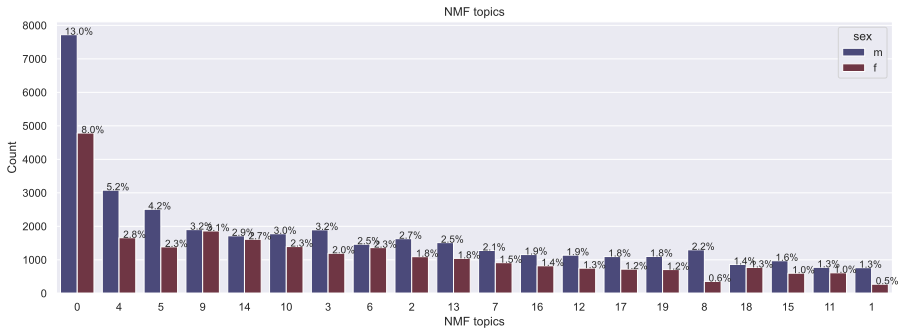

In [58]:
# NMF topics by gender
plt.figure(figsize=(15, 5))
ax = sns.countplot(x='cluster', data=d, 
                   hue='sex', 
                   palette='icefire',
                   order=d['cluster'].value_counts().iloc[:20].index)
ax.set_title("NMF topics")
ax.set(xlabel='NMF topics', ylabel='Count') 
show_percentage(ax, d)
plt.show()

# Sentiment Analysis

In [59]:
# For sentiment analysis
from textblob import TextBlob

In [60]:
# Function for sentiment analysis
def sentiment_analysis(essays):
 # Create a function to get the subjectivity
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 # Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity'
 d["TextBlob_Subjectivity"] = d["essays"].apply(getSubjectivity)
 d["TextBlob_Polarity"] = d["essays"].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"
 d["TextBlob_Analysis"] = d["TextBlob_Polarity"].apply(getAnalysis)
 return essays

In [61]:
# Takes long time to run
# Running sentiment analysis on combined essays
sentiment_analysis(d["essays"])

0         about me:  i would love to think that i was s...
1         i am a chef: this is what that means. 1. i am...
2         i'm not ashamed of much, but writing public t...
3         i work in a library and go to school. . . rea...
4         hey how's it going? currently vague on the pr...
                               ...                        
59569     vibrant, expressive, caring optimist. i love ...
59570     i'm nick. i never know what to write about my...
59571     hello! i enjoy traveling, watching movies, an...
59572     "all i have in this world are my balls and my...
59573     is it odd that having a little "enemy" status...
Name: essays, Length: 59574, dtype: object

In [62]:
# Count of profiles within each sentiment group 
d["TextBlob_Analysis"].value_counts()

Positive    55322
Neutral      2731
Negative     1521
Name: TextBlob_Analysis, dtype: int64

Text(0.5, 1.0, 'Polarity across Age')

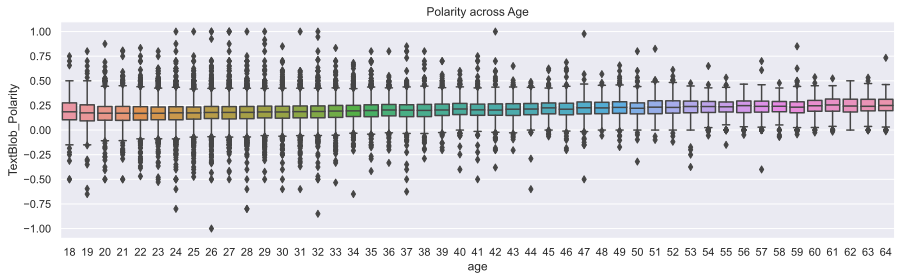

In [63]:
# Polarity for each age 
plt.figure(figsize=(15,4))
sns.boxplot(x='age', y='TextBlob_Polarity', data=d).set_title("Polarity across Age")


Text(0.5, 1.0, 'Polarity by Sex')

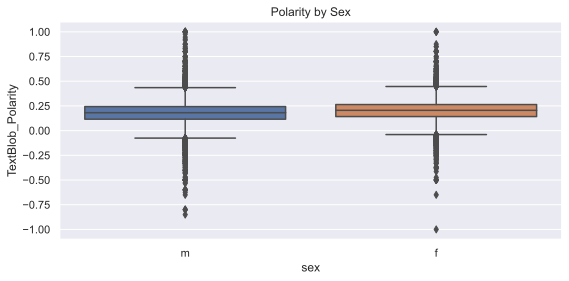

In [64]:
# Polarity by Sex 
plt.figure(figsize=(9,4))
sns.boxplot(x='sex', y='TextBlob_Polarity', data=d).set_title('Polarity by Sex')

In [65]:
d.groupby(["sex"]).mean()

,age,cluster,TextBlob_Subjectivity,TextBlob_Polarity
sex,,,,
f,32.54,7.58,0.51,0.20
m,31.85,7.06,0.48,0.18


In [66]:
# binning the ages by generation 
bins = [18, 22, 37, 53, 64]
names = ['GenZ', 'Millenials', 'GenX', 'Boomers']
d['age_group'] = pd.cut(d['age'], bins, labels=names)

Text(0.5, 1.0, 'Polarity across Generations')

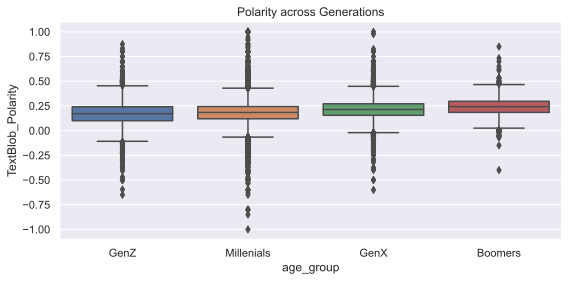

In [67]:
# Polarity by generation
plt.figure(figsize=(9,4))
sns.boxplot(x='age_group', y='TextBlob_Polarity', data=d).set_title('Polarity across Generations')

In [68]:
# Scores by generation
d.groupby(["age_group"]).mean()

,age,cluster,TextBlob_Subjectivity,TextBlob_Polarity
age_group,,,,
GenZ,20.95,7.06,0.49,0.17
Millenials,28.99,7.23,0.49,0.18
GenX,43.45,7.48,0.49,0.21
Boomers,58.23,7.45,0.48,0.24


# WordCloud

In [69]:
from collections import Counter  # Count the frequency of distinct strings
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS  # Generate wordclouds
from PIL import Image  # Load images from files

In [70]:
# Takes long time to run 
# tokenizing for word clouds
d['essays'] = d['essays'].astype(str)
d['token_essays_stem'] = d['essays'].map(tokenize_stem)

In [71]:
# separating profiles by male and female 
d_male = d[d['sex'] == 'm']
d_female = d[d['sex'] == 'f']

In [72]:
# Importing heart image for word cloud 
image = Image.open("C:/Users/kmche/Pictures/heart.jpg")
mask = np.array(image)

(-0.5, 499.5, 499.5, -0.5)

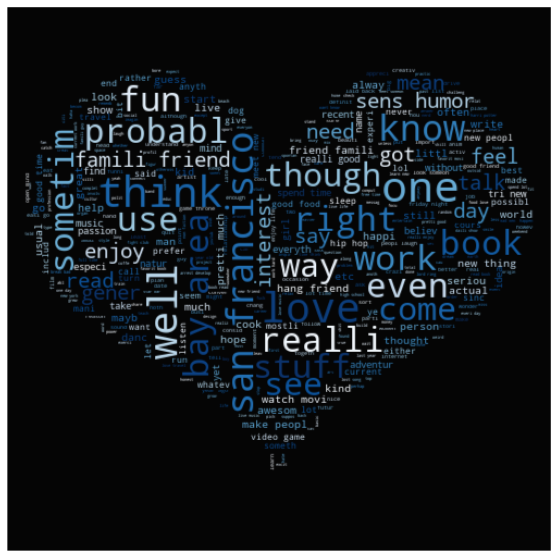

In [73]:
# Male Word Cloud 
plt.figure(figsize=(13,10))
wc = WordCloud(max_words=2000, mask=mask,
                stopwords=STOPWORDS, max_font_size= 40) 
wc_text = d_male['token_essays_stem'].apply(lambda x: ' '.join(x)).values
wc.generate(' '.join(wc_text))
plt.imshow(wc.recolor( colormap= 'Blues' , random_state=17), alpha=0.98)
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

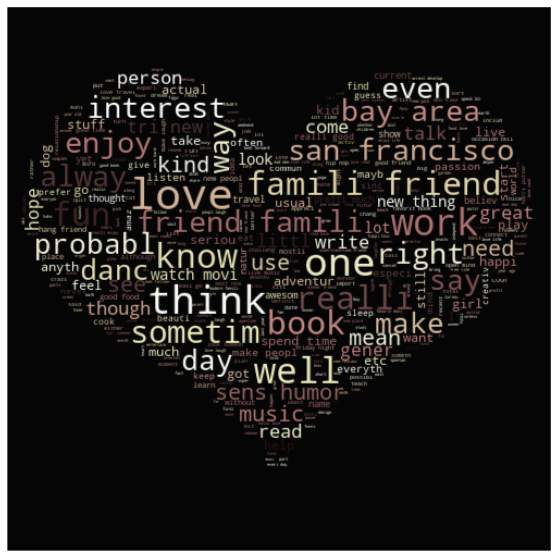

In [74]:
# Female Word Cloud 
plt.figure(figsize=(13,10))
wc = WordCloud(max_words=2000, mask=mask,
                stopwords=STOPWORDS, max_font_size= 40) 
wc_text = d_female['token_essays_stem'].apply(lambda x: ' '.join(x)).values
wc.generate(' '.join(wc_text))
plt.imshow(wc.recolor( colormap= 'pink' , random_state=17), alpha=0.98)
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

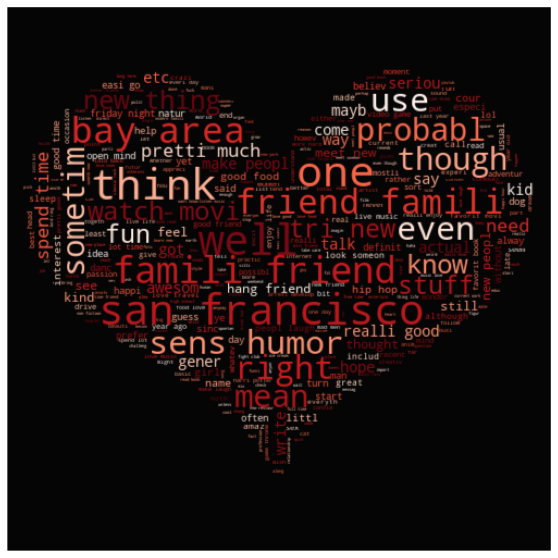

In [75]:
# Combined Word Cloud 
plt.figure(figsize=(13,10))
wc = WordCloud(max_words=2000, mask=mask,
                stopwords=STOPWORDS, max_font_size= 40) 
wc_text = d['token_essays_stem'].apply(lambda x: ' '.join(x)).values
wc.generate(' '.join(wc_text))
plt.imshow(wc.recolor( colormap= 'Reds' , random_state=17), alpha=0.98)
plt.axis('off')

# Matching Algorithm with Jaccard Similarity

In [76]:
# For Jaccard similarity score for matching algorithm
from sklearn.metrics import jaccard_score

In [77]:
# Jaccard Similarity formula J (A,B) = |Intersection (A,B)| / |Union (A,B)|
def compute_jaccard_similarity_score(x, y):
    intersection = len(set(x).intersection(set(y)))
    union = len(set(x).union(set(y)))
    return intersection / float(union)

In [78]:
# Removing free text responses and other uninformative/high NA columns for find_match
d_match = d.copy()
d_match.drop(['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9', 'essays', 'tokens0', 'tokens1_stem', 'tokens0_stem', 'tokens4_stem', 'token_essays_stem', 'TextBlob_Subjectivity', 'TextBlob_Polarity', 'last_online', 'income'], axis=1, inplace=True)
d_match.head(1)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,location,offspring,pets,religion,sign,smokes,speaks,cluster,TextBlob_Analysis,age_group
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,8,Positive,GenZ


In [79]:
# Matching algorithm to find a match between Gay and Straight profiles with revised dataset
def find_match(user_id_index):
    score_max = 0
    idx = 0
    for i in range(len(d_match)):
        #gay
        if d_match['orientation'][user_id_index] == 'gay':
            if (i != user_id_index) and (d_match.iloc[user_id_index]['sex'] == d_match.iloc[i]['sex']) and (d_match.iloc[user_id_index]['cluster'] == d_match.iloc[i]['cluster']) and (d_match.iloc[user_id_index]['TextBlob_Analysis'] == d_match.iloc[i]['TextBlob_Analysis']):
                score = compute_jaccard_similarity_score(d_match.iloc[user_id_index].values, d_match.iloc[i].values)
                if score > score_max:
                    score_max = score
                    idx = i
        else: #straight
            if (i != user_id_index) & (d_match.iloc[user_id_index]['sex'] != d_match.iloc[i]['sex']) & (d_match.iloc[user_id_index]['cluster'] == d_match.iloc[i]['cluster']) & (d_match.iloc[user_id_index]['TextBlob_Analysis'] == d_match.iloc[i]['TextBlob_Analysis']):
                score = compute_jaccard_similarity_score(d_match.iloc[user_id_index].values, d_match.iloc[i].values)
                if score > score_max:
                    score_max = score
                    idx = i      
    return d_match.iloc[(d_match.index == user_id_index) | (d_match.index == idx)]    

In [80]:
# Implementing matching algorithm by index for gay profile 
find_match(81)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,location,offspring,pets,religion,sign,smokes,speaks,cluster,TextBlob_Analysis,age_group
81,31,single,m,gay,average,mostly anything,socially,never,graduated from masters program,white,...,"san francisco, california",,likes dogs and likes cats,atheism,,no,"english, german (fluently), spanish (okay)",10,Positive,Millenials
36681,31,single,m,gay,average,mostly anything,socially,never,graduated from college/university,white,...,"san francisco, california",,likes dogs and dislikes cats,,leo but it doesn&rsquo;t matter,no,"english (fluently), spanish (poorly)",10,Positive,Millenials


In [81]:
# Computing Jaccard similarity score 
compute_jaccard_similarity_score(d_match.iloc[81].values, d_match.iloc[36681].values)

0.64

In [82]:
# Implementing matching algorithm by index for straight profile 
find_match(777)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,location,offspring,pets,religion,sign,smokes,speaks,cluster,TextBlob_Analysis,age_group
777,25,single,m,straight,athletic,mostly anything,socially,never,graduated from masters program,,...,"san francisco, california",,likes dogs,,capricorn but it doesn&rsquo;t matter,no,"english (fluently), spanish (poorly)",9,Positive,Millenials
34677,33,single,f,straight,athletic,mostly anything,socially,never,graduated from masters program,white,...,"san francisco, california",,likes dogs and dislikes cats,,,no,"english (fluently), spanish (poorly)",9,Positive,Millenials


In [83]:
# Computing Jaccard similarity score 
compute_jaccard_similarity_score(d_match.iloc[777].values, d_match.iloc[34677].values)

0.5384615384615384